#Relatório 2 - Cálculo Numérico Computacional
##Nome: Guilherme Dallmann Lima
##Matricula: 19200035
##Turma: T2

#Implementação dos Métodos e Bibliotecas

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sympy import *
import time
x = Symbol('x')
values = []

***Show Graphics***

In [ ]:
def plot_two_functions(function1, function2, initial, final, numberPoints, title, xlabel, ylabel, label1, label2, point=None):
    curva = np.linspace(initial, final, numberPoints)
    valores1 = [function1(valor) for valor in curva]
    valores2 = [function2(valor) for valor in curva]
    plt.title(title, fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(0, color='k')
    plt.plot(curva, valores1, linestyle='-', label=label1)
    plt.plot(curva, valores2, linestyle='-', label=label2)
    if point:
        plt.plot(point[0], point[1], 'ro')
    plt.legend()
    plt.show()

***Pivotação Parcial***

In [ ]:
def pivotacao(j, matrizA, n, p):
  aMax = abs(matrizA[j][j])
  for k in range(j+1, n):
    if(abs(matrizA[k][j]) > aMax):

      aMax = matrizA[k][j]
      p = k

  return aMax, p

***Gaussiana***

In [ ]:
def Gaussiana(matrizA, b, n, pivot=True):
  det = 1
  info = 0
  for j in range(n):
    p = j
    aMax = abs(matrizA[j][j])

    if(pivot):
        aMax, p = pivotacao(j, matrizA, n, p)
        #for k in range(j+1, n):

          #if(abs(matrizA[k][j]) > aMax):
            #aMax = matrizA[k][j]
            #p = k
    if p != j:
        for k in range(n):
          t = matrizA[j][k]
          matrizA[j][k] = matrizA[p][k]
          matrizA[p][k] = t
        t = b[j]
        b[j] = b[p]
        b[p] = t
        det  = (det * -1)
    det = det * matrizA[j][j]
    if abs(matrizA[j][j]) != 0:
        r = 1/matrizA[j][j]
        for i in range(j+1, n):
          mult = matrizA[i][j] * r
          matrizA[i][j] = 0
          for k in range(j+1, n):
            matrizA[i][k] = matrizA[i][k] - (mult * matrizA[j][k])
          b[i] = b[i] - (mult * b[j])
    else:
      if info == 0:
          info = j
  det = det * matrizA[n-1][n-1]
  if(info == 0 and abs(matrizA[n-1][n-1])):
      info = n
  return matrizA, b, det, info


***FatoracaoLU***

In [ ]:
def FatoracaoLU(A, b, n):

  L = np.identity(n)
  U = np.copy(A)

  info = 0
  PdU = 1

  for j in range (n):
    p = j
    PdU = PdU * U[j][j]

    if (abs(U[j][j]) != 0):
      r = 1 / U[j][j]
      for i in range (j+1, n):
        mult = U[i][j] * r
        L[i][j] = mult
        U[i][j] = 0
        for k in range (j+1, n):
          U[i][k] = U[i][k] - mult * U[j][k]
        b[i] = b[i] - mult * b[j]
    else:
      if info == 0:
        info = j

  return L, U, b

***Cholesky***

In [ ]:
def cholesky(n , A):
    G = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            if j == i:
                sum = 0
                for k in range(j):
                    sum += G[j][k]**2
                G[j][j] = np.sqrt(A[j][j] - sum)
            else:
                sum = 0
                for k in range(j):
                    sum += G[i][k] * G[j][k]
                G[i][j] = (A[i][j] - sum) / G[j][j]
    return G, G.T

***Gaus Jacobi***

In [ ]:
def gausJacobi(n, A, b, toler, iterMax):
  x = [0]*n
  v = [0]*n
  for i in range(n):
    x[i] = b[i]/A[i][i]
  iter = 0
  true = True
  while true:
    iter = iter + 1
    for i in range(n):
      soma = 0
      for j in range(n):
        if i != j:
          soma = soma + A[i][j]*x[j]
      v[i] = (b[i] - soma)/A[i][i]
    normaNum = 0
    normaDen = 0
    for i in range(n):
      t = abs(v[i] - x[i])
      if t > normaNum:
        normaNum = t
      if abs(v[i]) > normaDen:
        normaDen = abs(v[i])
      x[i] = v[i]
    normaRel = normaNum/normaDen
    #print(f"Iteracao: {iter}")
    #print(f"X: {x}")
    #print(f"Norma Rel: {normaRel}")
    #print("======================")
    if (normaRel <= toler) or (iter >= iterMax):
      true = False
  if normaRel <= toler:
    info = 0
  else:
    info = 1

  return x, iter, info

***Gauss Seidel***

In [ ]:
def gausSeidel(n, A, b, toler, iterMax):
  x = [0]*n
  v = [0]*n
  for i in range(n):
    x[i] = b[i]/A[i][i]
  iter = 0
  true = True
  while true:
    iter = iter + 1
    normaNum = 0
    normaDen = 0
    for i in range(n):
      soma = 0
      for j in range(n):
        if i != j:
          soma = soma + (A[i][j] * x[j])
      v[i] = x[i]
      x[i] = (b[i] - soma)/A[i][i]
      t = abs(v[i] - x[i])
      if t > normaNum:
        normaNum = t
      if abs(x[i]) > normaDen:
        normaDen = abs(x[i])
    normaRel = normaNum / normaDen
    #print(f"Iteracao: {iter}")
    #print(f"X: {x}")
    #print(f"Norma Rel: {normaRel}")
    #print("======================")
    if(normaRel <= toler) or (iter >= iterMax):
      true = False
  if normaRel <= toler:
    info = 0
  else:
    info = 1

  return x, iter, info


#Questões

##***1) O circuito a seguir tem quatro resistências e duas fontes de voltagem. As resistências  são R1, R2, R3 e R4 ohms; as fontes de voltagem E1 e E2 volts; e as correntes são i1, i2 e i3 amperes.***


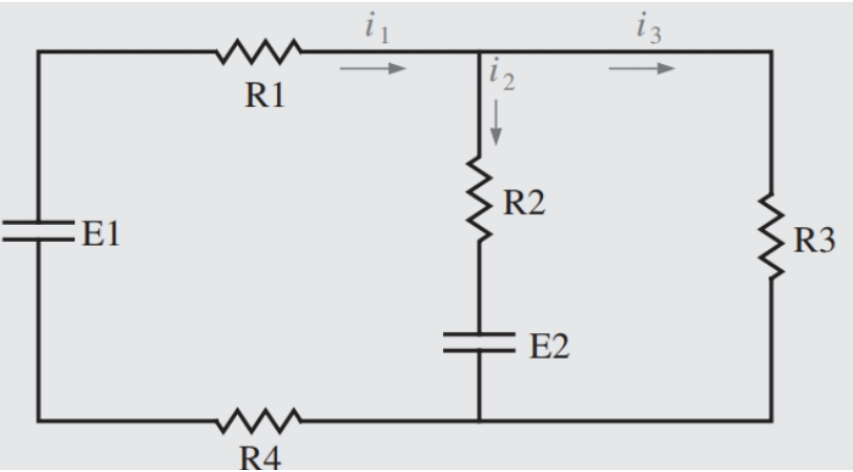


###A)Usando a eliminação de Gauss sem pivotamento, encontre i1, i2 e i3 quando:

E1 = 12 volts

E2 = 10 volts

R1 = 0.001 ohms

R2 = 3.333 ohms

R3 = 4.002 ohms

R4 = 0.012 ohm

Encontre as correntes i1, i2 e i3 e aritmética de truncamento com três  algarismos


Função é dada por:
\begin{align}
R_2 * i_2 - R_4 * i_1 + R_1 * i_1 + E_2 - E_1 = 0\\
R_3 * i_3 - R_2 * i_2 - E_2 = 0\\
i_1 - i_2 - i_3 = 0
\end{align}

In [ ]:
A = np.array([
    [1, -1, -1],
    [-0.011, 3.333, 0],
    [0, -3.333, 4.002]
], dtype="float")

b = np.array([2, 10, 0])

A, b, det, info = Gaussiana(A, b, 3, False)

i1, i2, i3 = np.linalg.solve(A, b)

print(f"Vetor: [ {i1}, {i2}, {i3} ]")
print(f"Determinante: {round(det, 3)}")
print(f"Info: {info}")
print(f"Resultado Final sem pivotamento: \n i1 = {round(i1, 3)}\n i2 = {round(i2, 3)}\n i3 = {round(i3, 3)} ")



Vetor: [ 7.524192240250563, 3.018531687561583, 2.50566055268898 ]
Determinante: 52.912
Info: 3
Resultado Final sem pivotamento: 
 i1 = 7.524
 i2 = 3.019
 i3 = 2.506 


###B)Usando a eliminação de Gauss com pivotamento parcial melhora a resposta da letra a?

In [ ]:
A = np.array([
    [1, -1, -1],
    [-0.011, 3.333, 0],
    [0, -3.333, 4.002]
], dtype="float")

b = np.array([2, 10, 0])

A, b, det, info = Gaussiana(A, b, 3, True)

i1, i2, i3 = np.linalg.solve(A, b)

print(f"Vetor: [ {i1}, {i2}, {i3} ]")
print(f"Determinante: {round(det,3)}")
print(f"Info: {info}")
print(f"Resultado Final com pivotamento: \n i1 = {round(i1, 3)}\n i2 = {round(i2, 3)}\n i3 = {round(i3, 3)} ")


Vetor: [ 7.532516602641081, 3.018559160704786, 2.513957441936295 ]
Determinante: 52.737
Info: 3
Resultado Final com pivotamento: 
 i1 = 7.533
 i2 = 3.019
 i3 = 2.514 


***R: Melhora a respota utilizando a pivotação Parcial, devido ao pivotamento parcial ser uma técnica utilizada no método de eliminação de Gauss que ajuda a evitar erros numéricos decorrentes de divisões por números muito pequenos ou muito próximos de zero. A ideia é escolher o pivô (elemento da diagonal principal) de tal forma que ele seja o maior elemento em valor absoluto da coluna correspondente, antes de fazer as eliminações sucessivas. ***

***O pivotamento parcial é importante para garantir a estabilidade numérica e melhorar a precisão dos resultados obtidos pelo método de eliminação de Gauss.***

##***2) O SELA abaixo pode ser decomposto na forma LU (Fatoração LU)? Caso positivo, encontre as matrizes L, U e o vetor solução.***

\begin{align}
6x_1 + 15x_2 + 55x_3 = 152.6 \\
15x_1 + 55x_2 + 225x_3 = 585.6 \\
55x_1 + 225x_2 + 979x_3 = 2488.8
\end{align}

***R: A Matriz pode ser decomposta utilizando o método da Fatoração LU***

In [ ]:
A = np.array([
    [6, 15, 55],
    [15, 55, 225],
    [55, 225, 979]
], dtype="double")

b = np.array([152.6, 585.6, 2488.8], dtype="double")

L, U, b = FatoracaoLU(A, b, 3)


y = np.linalg.solve(L, b)
x = np.linalg.solve(U, y)

print(f"Matriz L: \n{L}\n")
print(f"Matriz U: \n{U}\n")
print(f"Vetor Solução: {x}")

Matriz L: 
[[1.         0.         0.        ]
 [2.5        1.         0.        ]
 [9.16666667 5.         1.        ]]

Matriz U: 
[[ 6.         15.         55.        ]
 [ 0.         17.5        87.5       ]
 [ 0.          0.         37.33333333]]

Vetor Solução: [ 11.27916667  49.10839286 -11.84910714]


##***3) O SELA abaixo pode ser decomposto na forma GG$^T$ (Fatoração de Cholesky)? Caso positivo, encontre as matrizes G, G$^T$ e o vetor solução.***

\begin{align}
8x_1 + 20x_2 + 15x_3 = 50 \\
20x_1 + 80x_2 + 50x_3 = 250 \\
15x_1 + 50x_2 + 60x_3 = 100
\end{align}

***R: A Matriz pode ser decomposta utilizando o método de Cholesky***

In [ ]:
A = A = np.array([
    [8, 20, 15],
    [20, 80, 50],
    [15, 50, 60]
], dtype="float")

b = np.array([50, 250, 100], dtype="float")

G, GT = cholesky(3, A)

y = np.linalg.solve(G, b)
x = np.linalg.solve(GT, y)

print(f"Matriz G: \n{G}\n")
print(f"Matriz Transposta de G: \n{GT}\n")
print(f"Vetor Solução: {x}")

Matriz G: 
[[2.82842712 0.         0.        ]
 [7.07106781 5.47722558 0.        ]
 [5.30330086 2.28217732 5.16397779]]

Matriz Transposta de G: 
[[2.82842712 7.07106781 5.30330086]
 [0.         5.47722558 2.28217732]
 [0.         0.         5.16397779]]

Vetor Solução: [-2.734375   4.8828125 -1.71875  ]


##***4) Resolver o SELA abaixo usando os métodos de Gauss-Jacobi e Gauss-Seidel e  verifique a convergência dos métodos. Considere como critério de parada $\dfrac{\mathrm{}||x^k-x^{k-1}||_{\infty}} {\mathrm{}||x^k||_{\infty}} < 10^{-3}$ ou $k_{max} = 10$. Justifique os resultados obtidos.***

\begin{align}
10x_1 + 2x_2 - 3x_3 + 5x_4 = 48 \\
x_1 + 8x_2 - x_3 + 2x_4 = 4 \\
2x_1 - x_2 - 5x_3 + x_4 = -11 \\
- x_1 + 2x_2 + 3x_3 + 20x_4 = 150
\end{align}

***Gaus Jacobi***

In [ ]:
A = np.array([
    [10, 2, -3, 5],
    [1, 8, -1, 2],
    [2, -1, -5, 1],
    [-1, 2, 3, 20]
], dtype="float")

b = np.array([48, 4, -11, 150], dtype="float")

x, iter, info = gausJacobi(4, A, b, 10**-3, 10)
print(f"Vetor solução: {x}\n")
print(f"iterações: {iter}\n")
print(f"Info: {info}\n")

Vetor solução: [2.9971968250000005, -1.00055990625, 4.998165762499999, 7.000635368749999]

iterações: 6

Info: 0



***Gauss Seidel***

In [ ]:
A = np.array([
    [10, 2, -3, 5],
    [1, 8, -1, 2],
    [2, -1, -5, 1],
    [-1, 2, 3, 20]
], dtype="float")

b = np.array([48, 4, -11, 150], dtype="float")

x, iter, info = gausSeidel(4, A, b, 10**-3, 10)
print(f"Vetor solução: {x}\n")
print(f"iterações: {iter}\n")
print(f"Info: {info}\n")

Vetor solução: [3.0013332019653327, -0.9998652252517699, 5.000522127101135, 6.999974863558274]

iterações: 4

Info: 0



***R: Método de Gauss-Seidel convergiu mais rapidamente devido a matriz ter uma diagonal dominante, fazendo com que o método de Gauss-Seidel converga mais rapidamente que o método de Gauss-Jacobi***

##5)

###A) Aplique analítica e graficamente os métodos de Gauss-Jacobi e Gauss-Seidel no sistema:

\begin{align}
2x_1 + 5x_2 = -3 \\
3x_1 + x_2 = 2
\end{align}

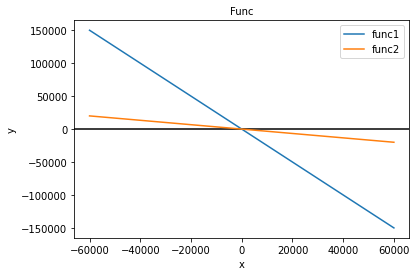

In [ ]:
func1 = lambda x : (- 5 * x - 3) / 2
func2 = lambda x : (2 - x) / 3
plot_two_functions(func1, func2, -60000, 60000, 10, "Func", "x", "y", "func1", "func2")


Vetor solução: [-59325.171875, 71190.40625]

iterações: 10

Info: 1



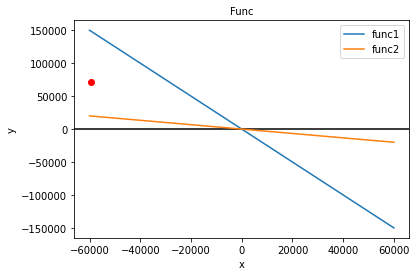

In [ ]:
func1 = lambda x : (- 5 * x - 3) / 2
func2 = lambda x : (2 - x) / 3
A = np.array([
    [2, 5],
    [3, 1]
], dtype="double")

b = np.array([-3, 2], dtype="double")

x, iter, info = gausJacobi(2, A, b, 10**-3, 10)

print(f"Vetor solução: {x}\n")
print(f"iterações: {iter}\n")
print(f"Info: {info}\n")
#plot_two_functions(func1, func2, -10, 10, 10, "Func", "funcao1", "funcao2", x)
plot_two_functions(func1, func2, -60000, 60000, 10, "Func", "x", "y", "func1", "func2", x)

Vetor solução: [-563135146.0947266, 1689405440.2841797]

iterações: 10

Info: 1



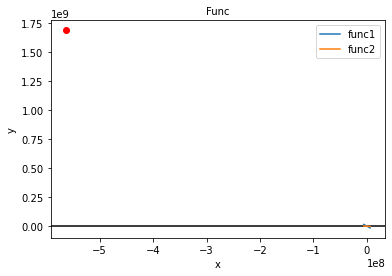

In [ ]:
func1 = lambda x : (- 5 * x - 3) / 2
func2 = lambda x : (2 - x) / 3
A = np.array([
    [2, 5],
    [3, 1]
], dtype="double")

b = np.array([-3, 2], dtype="double")

x, iter, info = gausSeidel(2, A, b, 10**-3, 10)

print(f"Vetor solução: {x}\n")
print(f"iterações: {iter}\n")
print(f"Info: {info}\n")
plot_two_functions(func1, func2, -6000000, 6000000, 1000, "Func", "x", "y", "func1", "func2", x)

###B)Repita o item (a) para o sistema permutando as equações.

***Gauss Jacobi***

Vetor solução: [-1.307279012345679, 0.9227851851851853]

iterações: 7

Info: 0



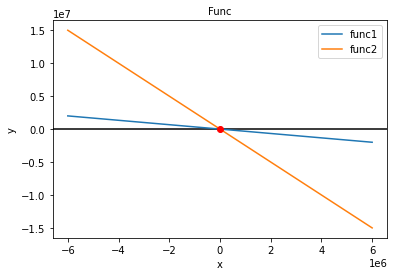

In [ ]:
func2 = lambda x : (- 5 * x - 3) / 2
func1 = lambda x : (2 - x) / 3
A = np.array([
    [3, 1],
    [2, 5]
], dtype="double")
x, iter, info = gausJacobi(2, A, b, 10**-3, 10)

print(f"Vetor solução: {x}\n")
print(f"iterações: {iter}\n")
print(f"Info: {info}\n")
plot_two_functions(func1, func2, -6000000, 6000000, 1000, "Func", "x", "y", "func1", "func2", x)

***Gauss Seidel***

Vetor solução: [-1.3076372016460904, 0.9230548806584362]

iterações: 5

Info: 0



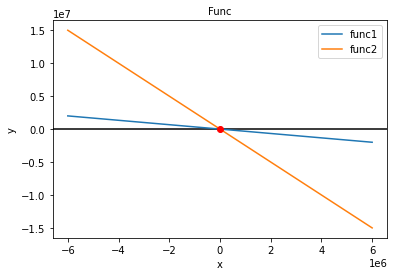

In [ ]:
func2 = lambda x : (- 5 * x - 3) / 2
func1 = lambda x : (2 - x) / 3
A = np.array([
    [3, 1],
    [2, 5]
], dtype="double")
x, iter, info = gausSeidel(2, A, b, 10**-3, 10)

print(f"Vetor solução: {x}\n")
print(f"iterações: {iter}\n")
print(f"Info: {info}\n")
plot_two_functions(func1, func2, -6000000, 6000000, 1000, "Func", "x", "y", "func1", "func2", x)

###C) Justifique os resultados obtidos

***Os métodos de Gauss-Jacobi e Gauss-Seidel são dois métodos iterativos usados para resolver sistemas de equações lineares. A principal diferença entre os dois é que o método de Gauss-Seidel utiliza os resultados das iterações anteriores para calcular os valores da próxima iteração, enquanto o método de Gauss-Jacobi utiliza os valores originais do vetor de solução em cada iteração.***

***Essa diferença pode levar a diferentes resultados para sistemas de equações lineares, dependendo da matriz de coeficientes do sistema e do vetor de solução inicial. Em geral, o método de Gauss-Seidel tende a convergir mais rapidamente do que o método de Gauss-Jacobi, especialmente para sistemas com coeficientes diagonais dominantes ou com matriz simétrica e positiva definida.***

***Os métodos de Gauss-Jacobi e Gauss-Seidel podem não convergir em um resultado devido a diversos fatores, entre eles tem que o método requer que a matriz dos coeficientes seja diagonal dominante ou simétrica definida positiva. Se esta condição não for satisfeita, o método pode não convergir.***

***Visto isso após permutar foi possível obter uma Matriz mais bem condicionada para o método de Gauss-Seidel comparado com o Gauss-Jacobi, obtendo uma diagonal dominante, fazendo com que o método de Gauss-Seidel convergisse mais rapidamente que o método de Gauss-Jacobi.***
